# Multi Linear Regression

In [147]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [148]:
X = load_boston().data
Y = load_boston().target
ones=np.ones((X.shape[0],1))

In [149]:
df = pd.DataFrame(X, columns=load_boston().feature_names)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [150]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [151]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Multivariate Regression

In [152]:
def hypothesis(X,theta):
    y=0.0
    for i in range(X.shape[0]):
        y += X[i]*theta[i]
    return y

m : No. of entries

n : No. of features

In [154]:
def error(X,Y,theta):
    err = 0.0
    m = Y.shape[0]
    for i in range(m):
        h = hypothesis(X[i], theta)
        err += (h - Y[i]) ** 2
    return err / m

In [99]:
def gradient(X,Y,theta):
    grad = np.zeros((theta.shape[0]))
    for i in range(theta.shape[0]):
        for j in range(X.shape[0]):
            h=hypothesis(X[j],theta)
            grad[i]+=(h-Y[j])*X[j][i]
            
    return grad/X.shape[0]

In [100]:
def gradient_descent(X,Y,lr=.1,max_itr=100):
    m,n=X.shape
    theta=np.zeros((n,))
    err=[]
    for i in range(max_itr):
        err.append(error(X,Y,theta))
        theta=theta-lr*gradient(X,Y,theta)
    return err,theta

In [101]:
X=np.hstack((np.ones((X.shape[0],1)),X))

In [103]:
err, theta = gradient_descent(X,Y)

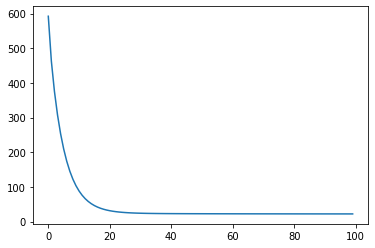

In [104]:
plt.plot(err)

In [105]:
theta

array([22.53220782, -0.78185418,  0.81390376, -0.27302486,  0.74237969,
       -1.58190647,  2.88681934, -0.10320657, -2.74824502,  1.4628725 ,
       -0.88418974, -1.95313341,  0.87190431, -3.64467529])

In [106]:
df=pd.read_csv("Train.csv").values
Y_train=df[:,-1]
X_train=df[:,:-1]

In [107]:
X_train.shape,Y_train.shape

((1600, 5), (1600,))

In [108]:
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
X_train = (X_train - mu) / sigma

In [109]:
X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))

In [110]:
err, theta = gradient_descent(X_train, Y_train)

In [111]:
X_test=pd.read_csv("Test.csv").values

In [112]:
X_test=(X_test-mu)/sigma

In [113]:
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [114]:
Y_test=[]
for i in range(theta.shape[0]):
    Y_test.append(hypothesis(X_test[i],theta))

In [115]:
Y_test=np.array(Y_test)
Y_test=np.reshape(Y_test,(-1,1))

In [116]:
df=pd.DataFrame(Y_test)

In [63]:
df.to_csv("Sol.csv",index_label=["Id","target"])

## Vectorization

In [156]:
def Hypothesis(X,theta):
    return np.dot(X,theta)

In [157]:
def Error(X,Y,theta):
    m, _= X.shape
    hx = Hypothesis(X, theta)
    return ((hx - Y) ** 2).sum() / m

## Gradient Descent
$$
\frac{\delta J}{\delta \theta_j} = \frac{1}{m} \Sigma_{i \in m} (h(x^{(i)}) - y^{(i)}) x^{(i)}_j
$$

Vectorized will be 

$$
\frac{\delta J}{\delta \theta} = \frac{1}{m} X^{T} \cdot (h(X) - Y)
$$

m = 2

n = 3

x(1) = [10, 23, 67]

x(2) = [100, 34, 67]

(h(x(1)) - y(1)) ^ 2

(h(x(1)) - y(1)) * x(1, 0) + (h(x(2)) - y(2)) * x(2, 0)
(h(x(1)) - y(1)) * x(1, 1) + (h(x(2)) - y(2)) * x(2, 1)
(h(x(1)) - y(1)) * x(1, 2) + (h(x(2)) - y(2)) * x(2, 2)

X: (m, n) --> (m, n + 1)
x(3) --> [1, 90, 89, 100, 4]
theta --> [t0, t1, t2, t3, t4]
h(theta, x(3)) --> t0 + 90 t1 + 89 t2 + 100 t3 + 4 t4
theta.T.dot(x(3)) (1, n + 1) . (n + 1, 1) --> (1, 1)


X.T dot (h(X) - Y)
(m, n + 1)
(n + 1, m) ((m, 1) - (m, 1))
(n + 1, m) dot (m, 1) --> (n + 1, 1)

In [158]:
def gradient(X, Y, theta):
    m, _ = X.shape
    hx = Hypothesis(X, theta)
    return X.T.dot(hx - Y) / m

In [172]:
def gradient_descent(X, Y, lr=0.1, max_itr=100):
    m, n = X.shape
    err_list = []
    theta = np.zeros((n,1))
    for i in range(max_itr):
        err = Error(X,Y,theta)
        err_list.append(err)
        grad = gradient(X, Y, theta)
        theta = theta - lr * grad
        if i % 10 == 0:
            print(f'Iteration no. {i} and cost is {err}')
    return theta, err_list

In [160]:
X = load_boston().data
Y = load_boston().target

In [161]:
Y.shape

(506,)

In [167]:
Y.shape

(506,)

In [162]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma

In [163]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [164]:
X.shape

(506, 13)

In [165]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [166]:
X.shape

(506, 14)

In [168]:
# bad code
# Y.reshape(-1, 1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [169]:
Y.shape

(506,)

In [170]:
time.time()

1609248767.8837235

In [178]:
start = time.time()
theta, err = gradient_descent(X, Y.reshape(-1,1), max_itr=1000, lr=0.2)
end = time.time()
print(end - start)

Iteration no. 0 and cost is 592.1469169960474
Iteration no. 10 and cost is 29.68173073310732
Iteration no. 20 and cost is 22.944630844120084
Iteration no. 30 and cost is 22.49319655216589
Iteration no. 40 and cost is 22.282575082708895
Iteration no. 50 and cost is 22.159041658715385
Iteration no. 60 and cost is 22.081879728068994
Iteration no. 70 and cost is 22.03107547611092
Iteration no. 80 and cost is 21.996103033282758
Iteration no. 90 and cost is 21.97116555092656
Iteration no. 100 and cost is 21.952910516824208
Iteration no. 110 and cost is 21.939295513345325
Iteration no. 120 and cost is 21.929010170787794
Iteration no. 130 and cost is 21.921173120355405
Iteration no. 140 and cost is 21.915167591780364
Iteration no. 150 and cost is 21.91054845284741
Iteration no. 160 and cost is 21.9069870792849
Iteration no. 170 and cost is 21.90423696013323
Iteration no. 180 and cost is 21.902111157005134
Iteration no. 190 and cost is 21.900466872936217
Iteration no. 200 and cost is 21.8991945

In [179]:
theta

array([[ 2.25328063e+01],
       [-9.28145628e-01],
       [ 1.08156786e+00],
       [ 1.40897615e-01],
       [ 6.81740066e-01],
       [-2.05671785e+00],
       [ 2.67423060e+00],
       [ 1.94657060e-02],
       [-3.10404443e+00],
       [ 2.66221163e+00],
       [-2.07677485e+00],
       [-2.06060644e+00],
       [ 8.49268375e-01],
       [-3.74362689e+00]])

In [180]:
theta.shape

(14, 1)

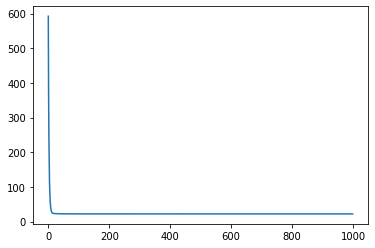

In [181]:
plt.plot(err)

In [182]:
theta.shape

(14, 1)

In [183]:
theta

array([[ 2.25328063e+01],
       [-9.28145628e-01],
       [ 1.08156786e+00],
       [ 1.40897615e-01],
       [ 6.81740066e-01],
       [-2.05671785e+00],
       [ 2.67423060e+00],
       [ 1.94657060e-02],
       [-3.10404443e+00],
       [ 2.66221163e+00],
       [-2.07677485e+00],
       [-2.06060644e+00],
       [ 8.49268375e-01],
       [-3.74362689e+00]])

In [184]:
def evaluate(Y_actual, Y_pred):
    num = ((Y_actual - Y_pred) ** 2).sum()
    denom = ((Y_actual - Y_actual.mean()) ** 2).sum()
    return (1 - (num / denom)) * 100

In [192]:
Y_pred = X.dot(theta)
Y_pred.shape

(506, 1)

In [195]:
Y = Y.reshape((506, 1))
Y.shape

(506, 1)

In [196]:
evaluate(Y, Y_pred)

74.06426641093418

## Polynomial Regression

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [208]:
X = pd.read_csv("weightedX.csv").values
Y = pd.read_csv("weightedY.csv").values

In [209]:
X.shape

(99, 1)

In [210]:
Y.shape

(99, 1)

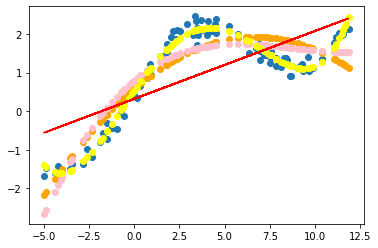

In [234]:
plt.scatter(X,Y)
plt.plot(X, lr_model.predict(X), color="red")
plt.scatter(X, lr2_model.predict(x), color="orange")
plt.scatter(X, lr3_model.predict(x3), color="pink")
plt.scatter(X, lr4_model.predict(x4), color="yellow")

In [212]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, Y)

LinearRegression()

In [214]:
x = np.hstack((X, X**2))

In [215]:
x

array([[ 2.33480000e+00,  5.45129104e+00],
       [ 1.32640000e-01,  1.75933696e-02],
       [ 2.34700000e+00,  5.50840900e+00],
       [ 6.73890000e+00,  4.54127732e+01],
       [ 3.70890000e+00,  1.37559392e+01],
       [ 1.18530000e+01,  1.40493609e+02],
       [-1.87080000e+00,  3.49989264e+00],
       [ 4.50250000e+00,  2.02725063e+01],
       [ 3.27980000e+00,  1.07570880e+01],
       [ 1.75730000e+00,  3.08810329e+00],
       [ 3.37840000e+00,  1.14135866e+01],
       [ 1.14700000e+01,  1.31560900e+02],
       [ 9.05950000e+00,  8.20745402e+01],
       [-2.81740000e+00,  7.93774276e+00],
       [ 9.31840000e+00,  8.68325786e+01],
       [ 8.42110000e+00,  7.09149252e+01],
       [ 8.62150000e-01,  7.43302622e-01],
       [ 7.55440000e+00,  5.70689594e+01],
       [-3.98830000e+00,  1.59065369e+01],
       [ 4.49700000e+00,  2.02230090e+01],
       [ 8.30620000e+00,  6.89929584e+01],
       [-2.60700000e+00,  6.79644900e+00],
       [ 4.48010000e+00,  2.00712960e+01],
       [-1.

In [216]:
x.shape

(99, 2)

In [217]:
lr2_model = LinearRegression()
lr2_model.fit(x, Y)

LinearRegression()

In [218]:
lr_model.score(X,Y)

0.5141377991406518

In [219]:
lr2_model.score(x,Y)

0.8152095679916156

In [221]:
x3 = np.hstack((x, X**3))

In [222]:
x3

array([[ 2.33480000e+00,  5.45129104e+00,  1.27276743e+01],
       [ 1.32640000e-01,  1.75933696e-02,  2.33358454e-03],
       [ 2.34700000e+00,  5.50840900e+00,  1.29282359e+01],
       [ 6.73890000e+00,  4.54127732e+01,  3.06032137e+02],
       [ 3.70890000e+00,  1.37559392e+01,  5.10194029e+01],
       [ 1.18530000e+01,  1.40493609e+02,  1.66527075e+03],
       [-1.87080000e+00,  3.49989264e+00, -6.54759915e+00],
       [ 4.50250000e+00,  2.02725063e+01,  9.12769594e+01],
       [ 3.27980000e+00,  1.07570880e+01,  3.52810974e+01],
       [ 1.75730000e+00,  3.08810329e+00,  5.42672391e+00],
       [ 3.37840000e+00,  1.14135866e+01,  3.85596608e+01],
       [ 1.14700000e+01,  1.31560900e+02,  1.50900352e+03],
       [ 9.05950000e+00,  8.20745402e+01,  7.43554297e+02],
       [-2.81740000e+00,  7.93774276e+00, -2.23637965e+01],
       [ 9.31840000e+00,  8.68325786e+01,  8.09140700e+02],
       [ 8.42110000e+00,  7.09149252e+01,  5.97181677e+02],
       [ 8.62150000e-01,  7.43302622e-01

In [223]:
x3.shape

(99, 3)

In [224]:
lr3_model = LinearRegression()
lr3_model.fit(x3, Y)

LinearRegression()

In [226]:
lr3_model.score(x3, Y)

0.8405207681165574

In [228]:
x4 = np.hstack((x3, X**4))
x4.shape

(99, 4)

In [229]:
lr4_model = LinearRegression()
lr4_model.fit(x4, Y)

LinearRegression()

In [231]:
lr4_model.score(x4, Y)

0.9787712201032478

In [236]:
x5 = np.hstack((x4, X ** 5))
x5.shape

(99, 5)

In [237]:
lr5_model = LinearRegression()
lr5_model.fit(x5, Y)

LinearRegression()

In [238]:
lr5_model.score(x5, Y)

0.978956548140068